In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import os
import cv2 as cv
import scipy as sp
import tensorflow as tf
import pickle
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/audio/de_npy.pickle', 'rb') as file:
    X = np.array(pickle.load(file)[:100])
    y = np.zeros(100) #other

with open('/content/drive/MyDrive/audio/en_npy.pickle', 'rb') as file:
    X = np.append(X, pickle.load(file)[:100], axis=0)
    y = np.append(y, np.full(100, 0)) #other

with open('/content/drive/MyDrive/audio/fr_npy.pickle', 'rb') as file:
    X = np.append(X, pickle.load(file)[:100], axis=0)
    y = np.append(y, np.full(100, 0)) #other

with open('/content/drive/MyDrive/audio/nl_npy.pickle', 'rb') as file:
    X = np.append(X, pickle.load(file)[:100], axis=0)
    y = np.append(y, np.full(100, 0)) #other

with open('/content/drive/MyDrive/audio/el_npy.pickle', 'rb') as file:
    X = np.append(X, pickle.load(file)[:100], axis=0)
    y = np.append(y, np.full(100, 0)) #other

with open('/content/drive/MyDrive/audio/es_npy.pickle', 'rb') as file:
    X = np.append(X, pickle.load(file)[:100], axis=0)
    y = np.append(y, np.full(100, 0)) #other


with open('/content/drive/MyDrive/audio/no_npy.pickle', 'rb') as file:
    X = np.append(X, pickle.load(file)[:1000], axis=0)
    y = np.append(y, np.full(999, 1)) #1

with open('/content/drive/MyDrive/audio/sv_npy.pickle', 'rb') as file:
    X = np.append(X, pickle.load(file)[:1000], axis=0)
    y = np.append(y, np.full(999, 2)) #2


X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(2598, 1000, 40)
(2598,)


In [ ]:
from sklearn.utils import shuffle
X,y = shuffle(X,y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X=[]
y=[]

In [ ]:
model = Sequential()
model.add(Conv2D(32,(7, 7), activation='relu', padding='valid', input_shape=(1000,40,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Conv2D(64,(5,5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()

In [ ]:
import math
from keras.callbacks import LearningRateScheduler

def step_decay(epoch):
    # 00158 = 90.4%
	initial_lrate = 0.00158
	drop = 0.9
	epochs_drop = 1
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

adam = Adam()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=adam,metrics=['accuracy'])


checkpoint = ModelCheckpoint(
                'model.h5',
                save_best_only=True,
                monitor='val_accuracy',
                verbose=0,
                mode='max'
                )

lrate = LearningRateScheduler(step_decay)

model.fit(
                X_train,
                y_train,
                epochs=60,
                callbacks=[checkpoint, lrate],
                verbose=1,
                validation_data=(X_test, y_test),
                batch_size=128)

Epoch 1/60


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


19/19 [==============================] - 9s 415ms/step - loss: 2.1582 - accuracy: 0.3837 - val_loss: 81.3239 - val_accuracy: 0.3192 - lr: 0.0014
Epoch 2/60
19/19 [==============================] - 5s 286ms/step - loss: 1.3924 - accuracy: 0.4145 - val_loss: 2.1637 - val_accuracy: 0.4231 - lr: 0.0013
Epoch 3/60
19/19 [==============================] - 5s 260ms/step - loss: 1.2433 - accuracy: 0.4658 - val_loss: 2.1731 - val_accuracy: 0.2692 - lr: 0.0012
Epoch 4/60
19/19 [==============================] - 5s 256ms/step - loss: 1.1334 - accuracy: 0.5154 - val_loss: 1.4770 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 5/60
19/19 [==============================] - 5s 269ms/step - loss: 1.1117 - accuracy: 0.5393 - val_loss: 1.5173 - val_accuracy: 0.2462 - lr: 9.3297e-04
Epoch 6/60
19/19 [==============================] - 5s 281ms/step - loss: 1.0220 - accuracy: 0.6001 - val_loss: 1.1061 - val_accuracy: 0.4462 - lr: 8.3968e-04
Epoch 7/60
19/19 [==============================] - 5s 268ms/step - loss

In [ ]:
model = keras.models.load_model("model.h5")

In [ ]:
from sklearn.metrics import accuracy_score
predictions = np.argmax(model.predict(X_test), axis=1)
print(accuracy_score(y_test, predictions))

9/9 [==============================] - 0s 23ms/step
0.7846153846153846


Text(141.0, 0.5, 'True')

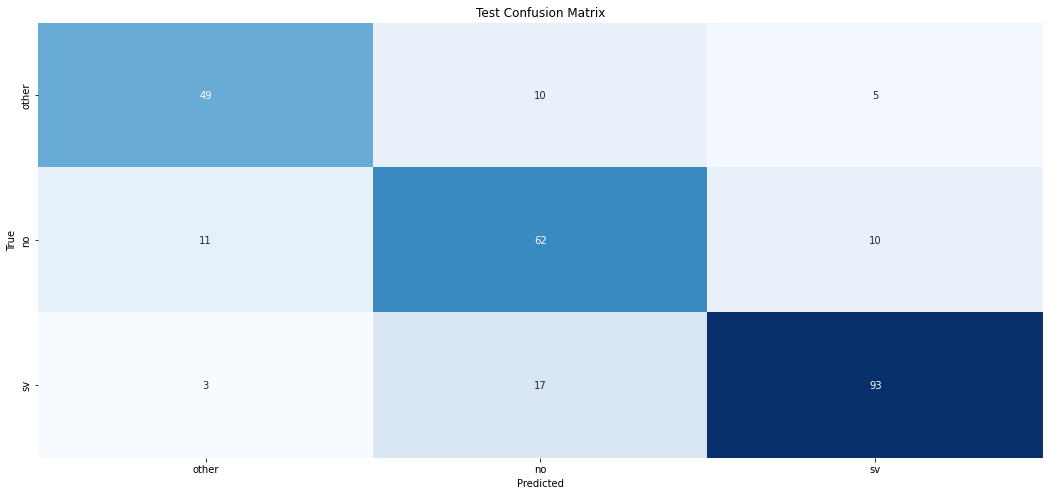

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_confu_matrix = confusion_matrix(y_test, predictions)
fault_type = ['other', 'no', 'sv']
plt.figure(1,figsize=(18,8))
sns.heatmap(test_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
